# Analysis Process for Variation RC Data

This system program have rule in path hierarchy.

```
<data folder>/:
|
|--<R>ohm <variation C>/:
|----<R>ohm <C>F (1).csv
|----<R>ohm <C>F (2).csv
|----<R>ohm <C>F (<i>).csv
|
|--<another folder>/:
|----<another file>.csv
|
```

In this notebook, I want to try for single folder in secondary level. For full system program, it will works for multiple folder actually. 

Check the main program at [**`olah_repetisi_rc.py`**](./olah_repetisi_rc.py)

### Import Library

In [1]:
import os
import pandas as pd

from formula import *
import json_function as fjson
from graph import *
from olah_repetisi_rc import *
from post_process import *

### Define Global Variable

Change change this as needed.

I declare this in global level in [**`olah_repetisi_rc.py`**](./olah_repetisi_rc.py)

In [2]:
data_path = "E:/_TUGAS/_ITBOneDrive/OneDrive - Institut Teknologi Bandung/_Kuliah/_sem7/7_kerja praktek/data/repetisi RC"
folder_name = ["465ohm variasi C/", "1003ohm variasi C/", "1468ohm variasi C/"]
folder_path = folder_name.copy()

fstart = 20e3
fend = 50e3

In [3]:
i = 0
for f in folder_path:
    folder_path[i] = os.path.join(data_path, f)
    print(folder_path[i])
    i += 1

E:/_TUGAS/_ITBOneDrive/OneDrive - Institut Teknologi Bandung/_Kuliah/_sem7/7_kerja praktek/data/repetisi RC\465ohm variasi C/
E:/_TUGAS/_ITBOneDrive/OneDrive - Institut Teknologi Bandung/_Kuliah/_sem7/7_kerja praktek/data/repetisi RC\1003ohm variasi C/
E:/_TUGAS/_ITBOneDrive/OneDrive - Institut Teknologi Bandung/_Kuliah/_sem7/7_kerja praktek/data/repetisi RC\1468ohm variasi C/


In [4]:
# prepare tmp files
fjson.initialize_tmp_files()

Initialize tmp files ... Done


### Prepare Dataframes

`files, dfs, dfs_list = prepare_data(folder_path_i)`

In [5]:
folder_path_i = folder_path[2]

# scan all files
path, dirs, files = next(os.walk(folder_path_i))

for file in files:
    print(file)

1468ohm (1).csv
1468ohm (2).csv
1468ohm (3).csv
1468ohm (4).csv
1468ohm (5).csv
1468ohm 10.57nF (1).csv
1468ohm 10.57nF (2).csv
1468ohm 10.57nF (3).csv
1468ohm 10.57nF (4).csv
1468ohm 10.57nF (5).csv
1468ohm 150pF (1).csv
1468ohm 150pF (2).csv
1468ohm 150pF (3).csv
1468ohm 150pF (4).csv
1468ohm 150pF (5).csv
1468ohm 180pF (1).csv
1468ohm 180pF (2).csv
1468ohm 180pF (3).csv
1468ohm 180pF (4).csv
1468ohm 180pF (5).csv
1468ohm 3.83nF (1).csv
1468ohm 3.83nF (2).csv
1468ohm 3.83nF (3).csv
1468ohm 3.83nF (4).csv
1468ohm 3.83nF (5).csv
1468ohm 5.53nF (1).csv
1468ohm 5.53nF (2).csv
1468ohm 5.53nF (3).csv
1468ohm 5.53nF (4).csv
1468ohm 5.53nF (5).csv
1468ohm 90pF (1).csv
1468ohm 90pF (2).csv
1468ohm 90pF (3).csv
1468ohm 90pF (4).csv
1468ohm 90pF (5).csv


In [6]:
# append datasets to the list
dfs = {}
for fn in files:
    path = folder_path_i + fn
    temp_df = pd.read_csv(path)
    dfs[fn[:-4]] = temp_df

dfs_list = list(dfs.values())

print( dfs_list[0].head() )
# print(dfs)

   Frequency    Impedance     Phase  Real  Imaginary   Magnitude  Unnamed: 6
0      20000  1473.149095  0.220256   157       -636  655.091597         NaN
1      21000  1469.353847  0.650554   169       -635  657.104254         NaN
2      22000  1462.972271  0.440396   177       -639  663.061083         NaN
3      23000  1464.177070  0.436056   185       -635  661.400030         NaN
4      24000  1466.274287  0.415278   192       -630  658.607622         NaN


In [7]:
# delete column contains NaN
for df in dfs_list:
    # get column name
    column_list = []
    for col in df.columns:
        column_list.append(col)
    
    # delete column after "Magnitude"
    # "Magnitude" in index 5
    for i in range(len(column_list)):
        if i > 5: del df[column_list[i]]

print( dfs_list[0].head() )
# print(dfs)

   Frequency    Impedance     Phase  Real  Imaginary   Magnitude
0      20000  1473.149095  0.220256   157       -636  655.091597
1      21000  1469.353847  0.650554   169       -635  657.104254
2      22000  1462.972271  0.440396   177       -639  663.061083
3      23000  1464.177070  0.436056   185       -635  661.400030
4      24000  1466.274287  0.415278   192       -630  658.607622


### Preprocessing of Every Dataframe

`variation_str, variation_data = preprocessing_rc_data(files)`

In [8]:
# extract the RC variation
variation_str = []
for f in files:
    if f[:-8] not in variation_str:
        variation_str.append( f[:-8] )

variation_data = variation_str.copy()
print(variation_data)

['1468ohm', '1468ohm 10.57nF', '1468ohm 150pF', '1468ohm 180pF', '1468ohm 3.83nF', '1468ohm 5.53nF', '1468ohm 90pF']


In [9]:
# remove units
for i in range(len(variation_data)):
    want_to_replaced = ["ohm", "F"]
    for str in want_to_replaced:
        if str in variation_data[i]:
            variation_data[i] = variation_data[i].replace(str, "")

print(variation_data)

['1468', '1468 10.57n', '1468 150p', '1468 180p', '1468 3.83n', '1468 5.53n', '1468 90p']


In [10]:
# convert "p" and "n" into 1e(-N)
convert_unit = [["k", "e3"], ["u", "e-6"], ["n", "e-9"], ["p", "e-12"]]
for i in range(len(variation_data)):
    for unit_str, unit_val in convert_unit:
        if unit_str in variation_data[i]:
            mystr = variation_data[i]
            variation_data[i] = mystr.replace(unit_str, unit_val)

print(variation_data)

['1468', '1468 10.57e-9', '1468 150e-12', '1468 180e-12', '1468 3.83e-9', '1468 5.53e-9', '1468 90e-12']


In [11]:
# split into [[R1, C1], [R2, C2], ...]
for i in range(len(variation_data)):
    mystr = variation_data[i]
    arr_split = mystr.split(" ")
    variation_data[i] = arr_split

print(variation_data)

[['1468'], ['1468', '10.57e-9'], ['1468', '150e-12'], ['1468', '180e-12'], ['1468', '3.83e-9'], ['1468', '5.53e-9'], ['1468', '90e-12']]


In [12]:
# convert as float
for i in range(len(variation_data)):
    if len(variation_data[i]) != 2:     # only R
        variation_data[i].append(0)     # add value of C = 0
    for j in range(len(variation_data[i])):
        variation_data[i][j] = float(variation_data[i][j])

print(variation_data)

[[1468.0, 0.0], [1468.0, 1.057e-08], [1468.0, 1.5e-10], [1468.0, 1.8e-10], [1468.0, 3.83e-09], [1468.0, 5.53e-09], [1468.0, 9e-11]]


### Get Reference Data & Impedance Error

In [13]:
iteration = len(dfs_list) // len(variation_data)

print(iteration)

5


```med
arr_z_ref, arr_phase_ref, dfs_list = get_data_ref(variation_data, dfs_list, iteration)
```

In [14]:
# theoritic as reference
fmid = calculate_fmid(fstart, fend)

arr_z_ref = []
arr_phase_ref = []
for i in range(len(variation_data)):
    r = variation_data[i][0]
    c = variation_data[i][1]
    xc = calculate_xc(fmid, c)
    z = calculate_z(r, xc)
    phase = calculate_phase(fmid, r, c)

    arr_z_ref.append(z)
    arr_phase_ref.append(phase)

print("fmid =", fmid, end="\n\n")
print("arr_z_ref =", arr_z_ref, end="\n\n")
print("arr_z_ref =", arr_z_ref)

fmid = 35000.0

arr_z_ref = [1468.0, 412.8438175607564, 1466.2818402511311, 1465.5277587843195, 923.1459800455001, 717.4116652914208, 1467.3807669096018]

arr_z_ref = [1468.0, 412.8438175607564, 1466.2818402511311, 1465.5277587843195, 923.1459800455001, 717.4116652914208, 1467.3807669096018]


In [15]:
# calculate error Z
i = 0
for df in dfs_list:
    df["%Z"] = calculate_error(arr_z_ref[i//iteration], df["Impedance"])
    i += 1
    
for i in range(len(dfs_list)):
    print(files[i])
    print( dfs_list[i].head() )
    print()

1468ohm (1).csv
   Frequency    Impedance     Phase  Real  Imaginary   Magnitude        %Z
0      20000  1473.149095  0.220256   157       -636  655.091597  0.350756
1      21000  1469.353847  0.650554   169       -635  657.104254  0.092224
2      22000  1462.972271  0.440396   177       -639  663.061083  0.342488
3      23000  1464.177070  0.436056   185       -635  661.400030  0.260418
4      24000  1466.274287  0.415278   192       -630  658.607622  0.117555

1468ohm (2).csv
   Frequency    Impedance     Phase  Real  Imaginary   Magnitude        %Z
0      20000  1467.179969  0.432211   160       -638  657.756794  0.055860
1      21000  1463.898792  0.773767   171       -637  659.552879  0.279374
2      22000  1467.829672  0.403131   176       -637  660.866855  0.011603
3      23000  1462.669871  0.328765   184       -636  662.081566  0.363088
4      24000  1464.147612  0.389953   192       -631  659.564250  0.262424

1468ohm (3).csv
   Frequency    Impedance     Phase  Real  Imagina

### Prepare Folder for Storing Result

`saved_dirname = prepare_result_folder(data_path)`

In [16]:
saved_dirname = prepare_result_folder(data_path)

print(saved_dirname)

repetisi RC/


### Plot Iteration Data

```md
graph_per_variation(variation_str, iteration, dfs_list, folder_path_i, saved_dirname,
                    x_data"", y_data="",
                    x_label="", y_label="",
                    suptitle_prefix="")
```

I want to get some graph:
- impedance error vs frequency
- impedance vs frequency
- phase vs frequency

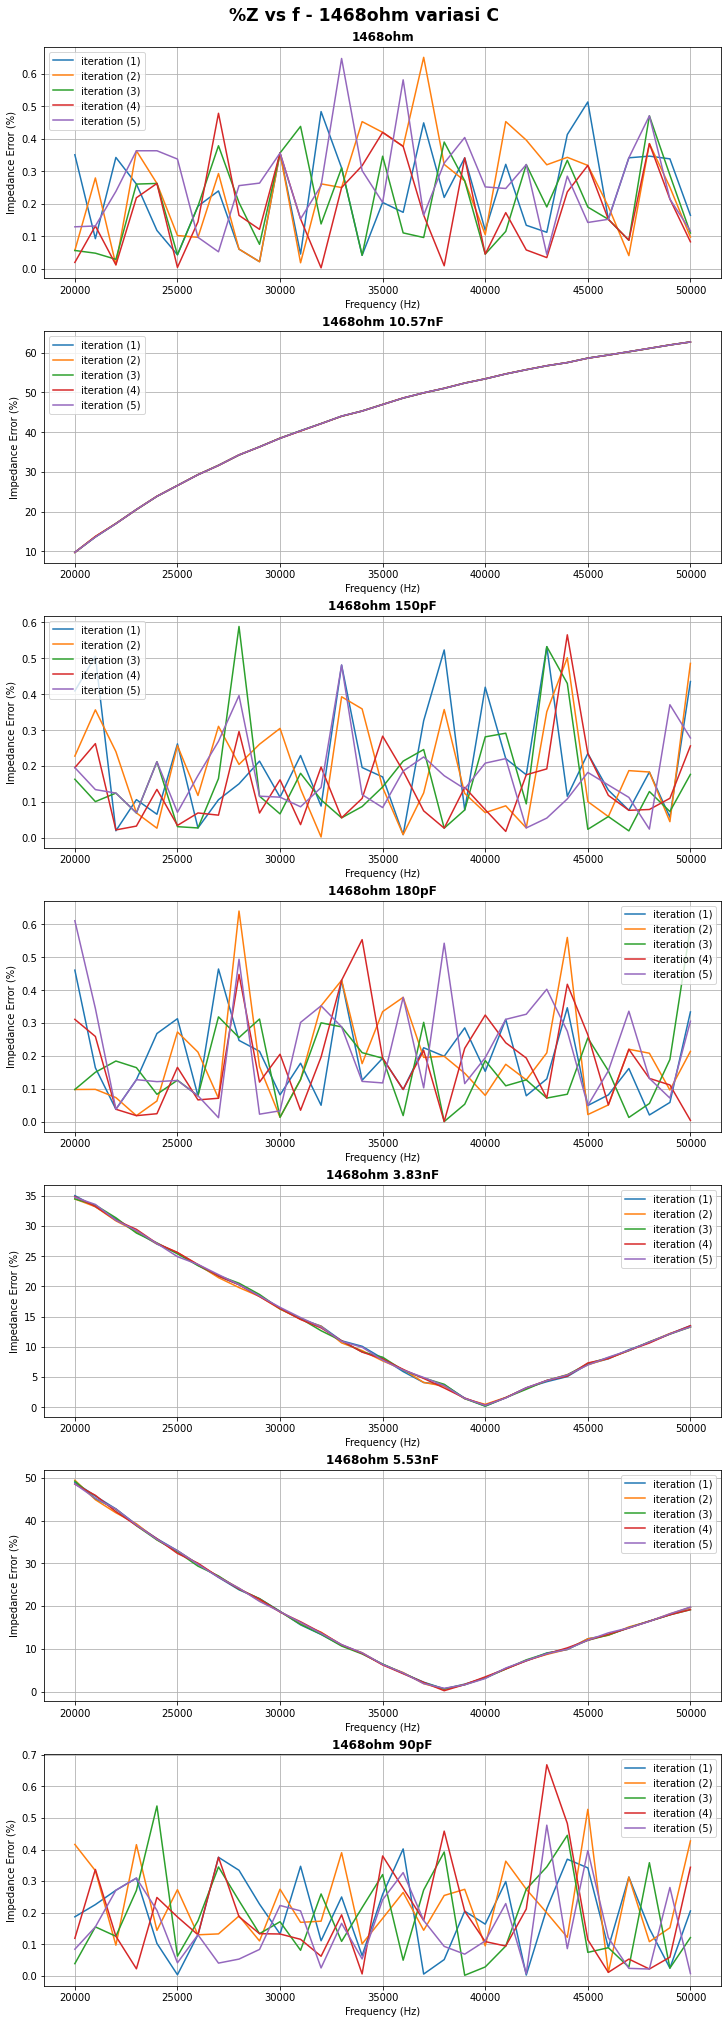

Saving %Z vs f - 1468ohm variasi C ... Done


In [17]:
graph_per_variation(variation_str, iteration, dfs_list, folder_path_i, saved_dirname,
                    x_data="Frequency", y_data="%Z",
                    x_label="Frequency (Hz)", y_label="Impedance Error (%)",
                    suptitle_prefix="%Z vs f")

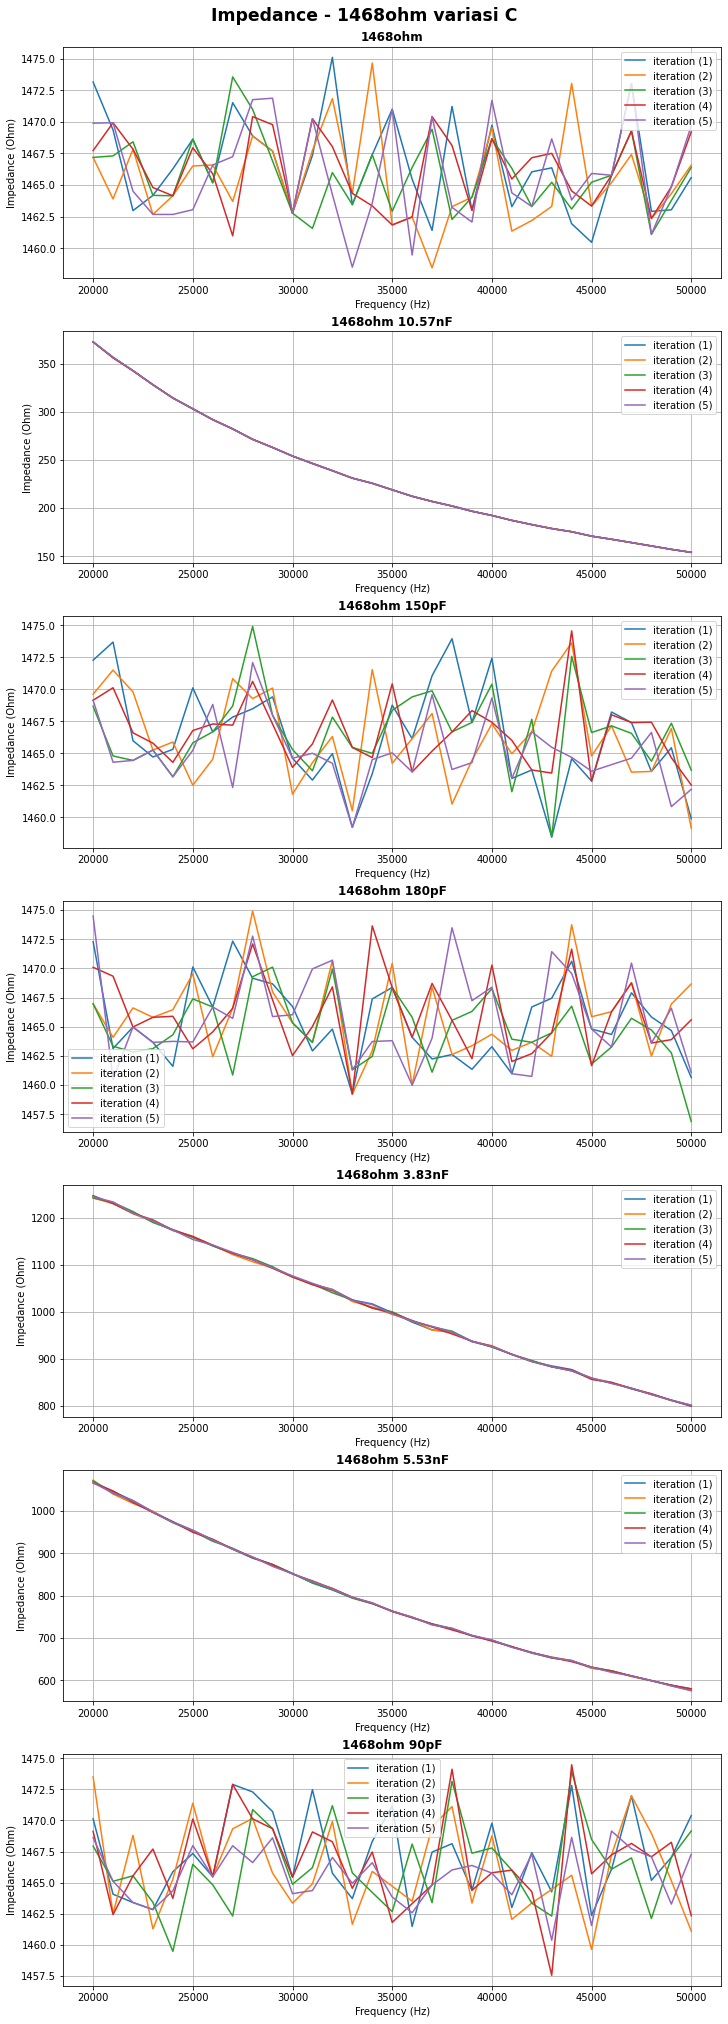

Saving Impedance - 1468ohm variasi C ... Done


In [18]:
graph_per_variation(variation_str, iteration, dfs_list, folder_path_i, saved_dirname,
                    x_data="Frequency", y_data="Impedance",
                    x_label="Frequency (Hz)", y_label="Impedance (Ohm)",
                    suptitle_prefix="Impedance")

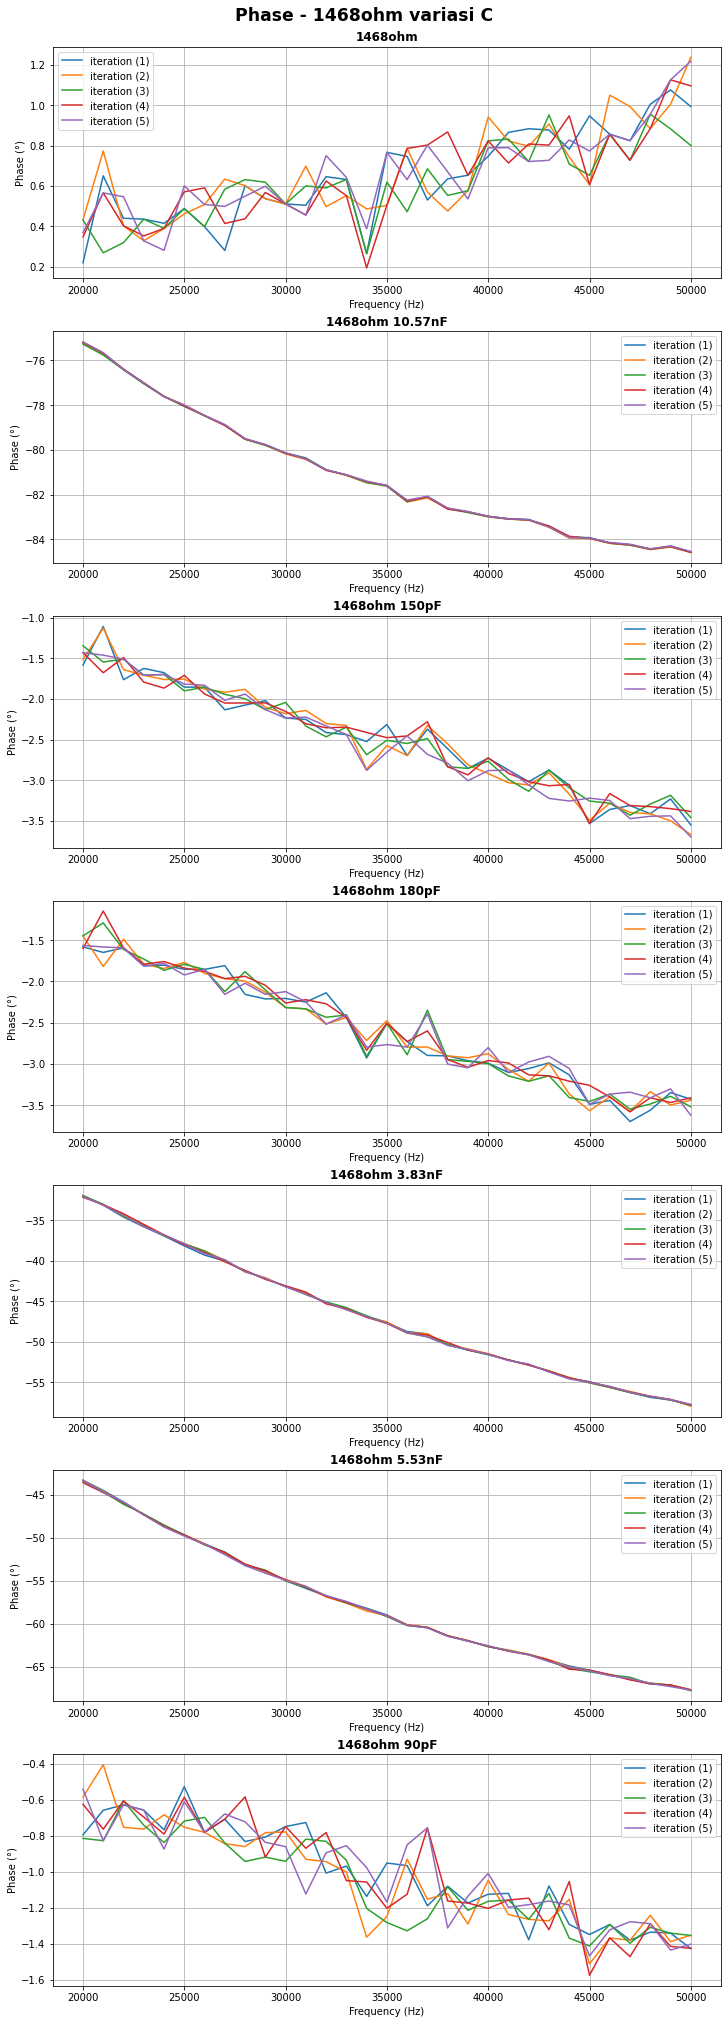

Saving Phase - 1468ohm variasi C ... Done


In [19]:
graph_per_variation(variation_str, iteration, dfs_list, folder_path_i, saved_dirname,
                    x_data="Frequency", y_data="Phase",
                    x_label="Frequency (Hz)", y_label="Phase (°)",
                    suptitle_prefix="Phase")

### Get Median Value from Every Dataframe

```md
arr_z_mid, arr_phase_mid, dfs_list = get_data_mid(dfs_list, iteration)
```

Data will be saved in [`variation_rc.json`](../tmp/variation_rc.json).

In [20]:
# get z_mid & phase_mid from every dataframe. data_mid is data at fmid
# arr = [[...], [...], ...]
arr_z_mid, arr_phase_mid, dfs_list = get_data_mid(dfs_list, iteration)

print(arr_z_mid, end="\n\n")
print(arr_phase_mid)

[[1470.9924749704, 1461.83614422613, 1462.91514850933, 1461.83614422613, 1470.9924749704], [218.882577251915, 218.855800393924, 218.89435948632, 219.019699229473, 218.992894528569], [1468.76874599259, 1464.22522203919, 1468.35980891688, 1470.4351701164, 1465.04496516337], [1468.35980891688, 1470.4351701164, 1468.35980891688, 1468.35980891688, 1463.79654160897], [997.596513883858, 993.826648561086, 999.491186511494, 996.778404111377, 994.894867348503], [763.242378683512, 762.556326105182, 763.697277189686, 762.213281117605, 763.051173203671], [1471.16303115102, 1464.71656602276, 1462.67534958163, 1461.80936705349, 1463.84695505932]]

[[0.766678366436224, 0.504628235112591, 0.619769481988726, 0.504628235112591, 0.766678366436224], [-81.5982807354842, -81.5873552363871, -81.6271450196431, -81.6061212001781, -81.5951878976914], [-2.31339753882276, -2.57191428250502, -2.50750128713014, -2.47515820306592, -2.65264385742552], [-2.50750128713014, -2.47515820306592, -2.50750128713014, -2.507501

### Get Averaged Curve per Variation

```md
df_choosen = build_df_choosen(dfs_list, iteration)
```

I want to normalize all iteration and only have one curve that represents all of the iteration data.

In [21]:
# build new dataframe

# array of averaged dataframe from every iteration
df_choosen = build_df_choosen(dfs_list, iteration)

print(len(df_choosen))
for i in range(len(df_choosen)):
    print(variation_str[i])
    print(df_choosen[i].head())
    print()

7
1468ohm
   Frequency    Impedance     Phase   Real  Imaginary   Magnitude        %Z
0    20000.0  1469.024088  0.360232  159.0     -637.4  656.932685  0.122047
1    21000.0  1468.082112  0.565206  168.2     -635.8  657.675096  0.136341
2    22000.0  1466.312035  0.422608  176.4     -637.6  661.552298  0.126424
3    23000.0  1463.697776  0.376498  184.4     -635.4  661.616842  0.293067
4    24000.0  1464.277217  0.373361  191.8     -631.0  659.506279  0.253596

1468ohm 10.57nF
   Frequency   Impedance      Phase    Real  Imaginary    Magnitude         %Z
0    20000.0  372.589578 -75.219080 -2277.8    -1233.0  2590.108946   9.750476
1    21000.0  356.368080 -75.699375 -2379.8    -1295.0  2709.331333  13.679686
2    22000.0  342.679415 -76.401904 -2484.4    -1356.8  2830.750787  16.995386
3    23000.0  328.076613 -77.020691 -2587.0    -1421.4  2951.770268  20.532512
4    24000.0  314.346230 -77.614480 -2689.0    -1485.6  3072.088617  23.858317

1468ohm 150pF
   Frequency    Impedance   

### Single Graph for Every Variation

```md
single_graph_from_df_choosen(df_choosen, variation_str, folder_path_i, saved_dirname,
                                x_data="", y_data="",
                                x_label="", y_label="",
                                suptitle_prefix="SG Impedance")
```

By that function, I want to get a graph that contains n curves (for every variation C).

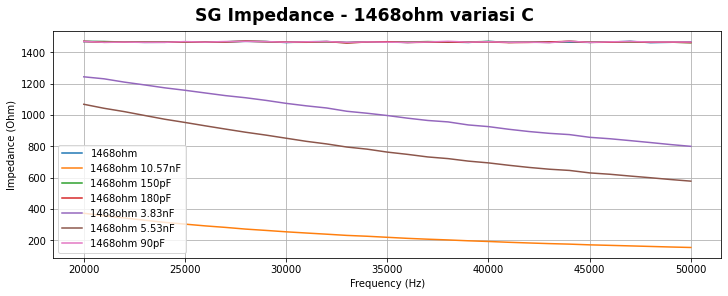

Saving SG Impedance - 1468ohm variasi C ... Done


In [22]:
single_graph_from_df_choosen(df_choosen, variation_str, folder_path_i, saved_dirname,
                                x_data="Frequency", y_data="Impedance",
                                x_label="Frequency (Hz)", y_label="Impedance (Ohm)",
                                suptitle_prefix="SG Impedance")

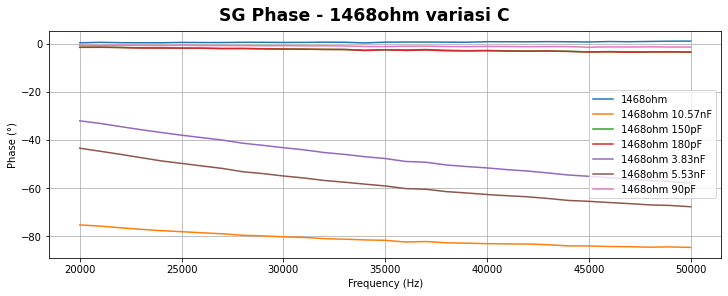

Saving SG Phase - 1468ohm variasi C ... Done


In [23]:
single_graph_from_df_choosen(df_choosen, variation_str, folder_path_i, saved_dirname,
                                x_data="Frequency", y_data="Phase",
                                x_label="Frequency (Hz)", y_label="Phase (°)",
                                suptitle_prefix="SG Phase")

### Save Mid Value from `averaged_dataframe`

```md
arr_z_avg, arr_phase_avg = get_z_phase_avg_from_df_choosen(df_choosen)
```

In [24]:
# store data_avg of parameter: z, phase. Stored to variatioin_rc_json
arr_z_avg, arr_phase_avg = get_z_phase_avg_from_df_choosen(df_choosen)

print(arr_z_avg, end="\n\n")
print(arr_phase_avg)

[1465.714477380478, 218.9290661780402, 1467.366782445686, 1467.862227695202, 996.5175240832635, 762.9520872599312, 1464.842253773644]

[0.6324765370172711, -81.60281801787679, -2.504123033789872, -2.552600925364506, -47.663025970986844, -59.040987957096796, -1.1712834072281897]


### Calculate Rtheory and Ctheory based on Zavg and Cavg

```md
arr_r_value, arr_c_value, \
        arr_r_theory_avg, arr_c_theory_avg, \
        arr_r_theory_ref, arr_c_theory_ref = \
        get_rc_value_theoryavg_theoryref(arr_z_avg, arr_phase_avg, arr_z_ref, arr_phase_ref, variation_data)
```

This represent as R and C from measurement (mid data).

In [25]:
arr_r_value, arr_c_value, \
        arr_r_theory_avg, arr_c_theory_avg, \
        arr_r_theory_ref, arr_c_theory_ref = \
        get_rc_value_theoryavg_theoryref(arr_z_avg, arr_phase_avg, arr_z_ref, arr_phase_ref, variation_data)

print(arr_r_theory_avg, end="\n\n")
print(arr_c_theory_avg, end="\n\n")
print(arr_r_theory_ref, end="\n\n")
print(arr_c_theory_ref)

[1465.8037842787833, 1499.16120908722, 1468.7693394847495, 1469.3201527025508, 1479.6329728364929, 1483.1169987228745, 1465.1483903416681]

[3.4246459243699696e-11, 2.0547911173250102e-08, 1.3539672659272227e-10, 1.3796960052778917e-10, 3.3730837728956695e-09, 5.111012500538339e-09, 6.345565591141126e-11]

[1468.0, 1467.9999999999995, 1468.0000000000002, 1468.0, 1467.9999999999998, 1468.0, 1468.0]

[0.0, 1.0569999999999998e-08, 1.5e-10, 1.8e-10, 3.83e-09, 5.530000000000001e-09, 9e-11]


### Get Error Value for All Parameters

```md
arr_z_err, arr_phase_err, \
    arr_rtheoryref_err, arr_ctheoryref_err, \
    arr_rtheoryavg_err, arr_ctheoryavg_err = \
    get_arr_err_from_all_parameters(arr_z_ref, arr_z_avg, arr_phase_ref, arr_phase_avg, variation_data)
```

In [26]:
# get_arr_err_from_all_parameters()

arr_z_err, arr_phase_err, \
    arr_rtheoryref_err, arr_ctheoryref_err, \
    arr_rtheoryavg_err, arr_ctheoryavg_err = \
    get_arr_err_from_all_parameters(arr_z_ref, arr_z_avg, arr_phase_ref, arr_phase_avg, variation_data)

print("arr_z_err =", arr_z_err, end="\n\n")
print("arr_phase_err =", arr_phase_err, end="\n\n")
print("arr_rtheoryavg_err =", arr_rtheoryavg_err, end="\n\n")
print("arr_ctheoryavg_err =", arr_ctheoryavg_err, end="\n\n")
print("arr_rtheoryref_err =", arr_rtheoryref_err, end="\n\n")
print("arr_ctheoryref_err =", arr_ctheoryref_err)

arr_z_err = [0.15568955173855575, 46.970486933397915, 0.0739927457854317, 0.15929202957021166, 7.947989334703824, 6.347878654860084, 0.1729962115630083]

arr_phase_err = [inf, 10.773388773882383, 9.675217875798857, 23.24583866670493, 6.6071129295259725, 2.8049089193925156, 29.62068376921385]

arr_rtheoryavg_err = [0.14960597555972283, 2.1226981667043567, 0.052407321849419625, 0.08992865821190639, 0.7924368417229464, 1.0297683053729252, 0.19425133912342515]

arr_ctheoryavg_err = [inf, 94.39840277436237, 9.735515604851821, 23.350221929006015, 11.929927600635265, 7.576627476702723, 29.493715653987486]

arr_rtheoryref_err = [0.0, 3.0977339978641967e-14, 1.5488669989320983e-14, 0.0, 1.5488669989320983e-14, 0.0, 0.0]

arr_ctheoryref_err = [inf, 1.5651478004787657e-14, 0.0, 0.0, 0.0, 2.9916116186366286e-14, 0.0]


### Save Important Information to JSON File

In [27]:
update_overview_json(files, iteration, variation_str)
update_variation_rc_json(variation_str, variation_data,
                            arr_z_ref, arr_phase_ref,
                            arr_z_mid, arr_phase_mid,
                            arr_z_avg, arr_phase_avg,
                            arr_z_err, arr_phase_err,
                            arr_r_theory_ref, arr_c_theory_ref,
                            arr_r_theory_avg, arr_c_theory_avg,
                            arr_rtheoryref_err, arr_ctheoryref_err,
                            arr_rtheoryavg_err, arr_ctheoryavg_err)

Writing tmp/overview.json ... Done
Writing tmp/variation_rc.json ... Done


### Infinity Value in JSON File

That's not become problems if I need to load the JSON file in python.

In [28]:
data = fjson.read_filejson(file_path="tmp/variation_rc.json")

list(data.items())[0]

('1468ohm',
 {'r': 1468.0,
  'c': 0.0,
  'z_ref': 1468.0,
  'z_mid': [1470.9924749704,
   1461.83614422613,
   1462.91514850933,
   1461.83614422613,
   1470.9924749704],
  'z_avg': 1465.714477380478,
  'z_err': 0.15568955173855575,
  'phase_ref': -0.0,
  'phase_mid': [0.766678366436224,
   0.504628235112591,
   0.619769481988726,
   0.504628235112591,
   0.766678366436224],
  'phase_avg': 0.6324765370172711,
  'phase_err': inf,
  'r_ref': 1468.0,
  'r_avg': 1465.8037842787833,
  'r_err_theoryref_measurement': 0.0,
  'r_err_theoryavg_measurement': 0.14960597555972283,
  'c_ref': 0.0,
  'c_avg': 3.4246459243699696e-11,
  'c_err_theoryref_measurement': inf,
  'c_err_theoryavg_measurement': inf})

### Tabulate `variation_rc.json` as Dataframe

In the JSON file, I using format like this below. Check in [**`json_function.py`**](./json_function.py)

```python
    variation_rc_obj = \
    {
        "Rohm CpF": {
            "r": None,  # from measurement
            "c": None,  # from measurement

            "z_ref": None,  # from calculate_z(r, xc) using r,c measurement
            "z_mid": [],    # from data retrieval. for every iteration
            "z_avg": None,  # from data retrieval
            "z_err": None,  # reference: "z_ref", data: "z_avg"

            "phase_ref": None,
            "phase_mid": [],
            "phase_avg": None,
            "phase_err": None,
            
            "r_ref": None,                          # from "z_ref" and "phase_ref"
            "r_avg": None,                          # from "z_avg" and "phase_avg"
            "r_err_theoryref_measurement": None,    # reference: "r", data: "r_ref"
            "r_err_theroyavg_measurement": None,    # reference: "r", data: "r_avg"

            "c_ref": None,
            "c_avg": None,
            "c_err_theoryref_measurement": None,
            "c_err_theoryavg_measurement": None
        }
    }
```

Call this after `process_analysis()`

```md
df_z_phase, df_r_c = prepare_df_from_variation_rc_json()
```

In [29]:
header = ["variation", "z_ref", "z_avg", "%z", "\u03C6_ref", "\u03C6_avg", "%\u03C6"]
data_key = ["variation", "z_ref", "z_avg", "z_err", "phase_ref", "phase_avg", "phase_err"]
df_z_phase = build_df_from_variation_rc_json(header, data_key)

df_z_phase

,variation,z_ref,z_avg,%z,φ_ref,φ_avg,%φ
0,1468ohm,1468,1465.714,0.156,0,0.632,inf
1,1468ohm 10.57nF,412.844,218.929,46.970,-73.666,-81.603,10.773
2,1468ohm 150pF,1466.282,1467.367,0.074,-2.772,-2.504,9.675
3,1468ohm 180pF,1465.528,1467.862,0.159,-3.326,-2.553,23.246
4,1468ohm 3.83nF,923.146,996.518,7.948,-51.035,-47.663,6.607
5,1468ohm 5.53nF,717.412,762.952,6.348,-60.745,-59.041,2.805
6,1468ohm 90pF,1467.381,1464.842,0.173,-1.664,-1.171,29.621


In [30]:
header = ["variation", "r_ref", "%r_ref", "r_avg", "%r_avg",
                        "c_ref", "%c_ref", "c_avg", "%c_avg"]
data_key = ["variation", "r_ref", "r_err_theoryref_measurement", "r_avg", "r_err_theoryavg_measurement",
                        "c_ref", "c_err_theoryref_measurement", "c_avg", "c_err_theoryavg_measurement",]
df_r_c = build_df_from_variation_rc_json(header, data_key)

df_r_c

,variation,r_ref,%r_ref,r_avg,%r_avg,c_ref,%c_ref,c_avg,%c_avg
0,1468ohm,1468,0,1465.804,0.150,0,inf,3.42e-11,inf
1,1468ohm 10.57nF,1468.000,3.10e-14,1499.161,2.123,1.06e-08,1.57e-14,2.05e-08,94.398
2,1468ohm 150pF,1468.000,1.55e-14,1468.769,0.052,1.50e-10,0,1.35e-10,9.736
3,1468ohm 180pF,1468,0,1469.320,0.090,1.80e-10,0,1.38e-10,23.350
4,1468ohm 3.83nF,1468.000,1.55e-14,1479.633,0.792,3.83e-09,0,3.37e-09,11.930
5,1468ohm 5.53nF,1468,0,1483.117,1.030,5.53e-09,2.99e-14,5.11e-09,7.577
6,1468ohm 90pF,1468,0,1465.148,0.194,9.00e-11,0,6.35e-11,29.494


### Save Dataframe as Image

Saving TB Impedance Phase.jpg ... Done


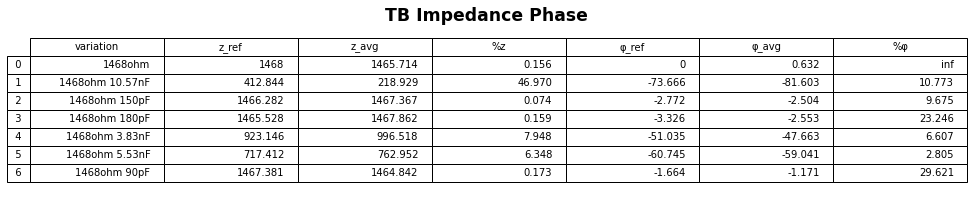

In [31]:
save_df_as_image(df_z_phase, filename="TB Impedance Phase", saved_dirname=saved_dirname)

Saving TB RC.jpg ... Done


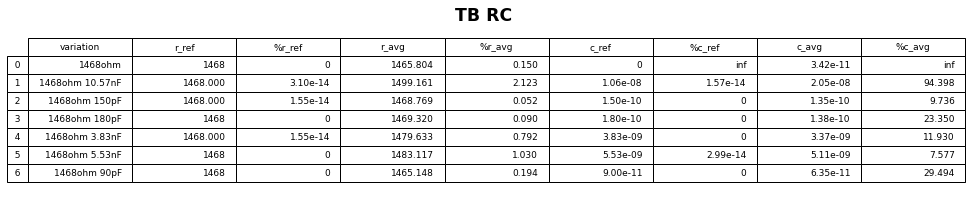

In [32]:
save_df_as_image(df_r_c, filename="TB RC", saved_dirname=saved_dirname)

### Tabulate Dataframe in Markdown File

I choose to display the table in markdown file because it more readible easily.

In [33]:
df_z_phase

,variation,z_ref,z_avg,%z,φ_ref,φ_avg,%φ
0,1468ohm,1468,1465.714,0.156,0,0.632,inf
1,1468ohm 10.57nF,412.844,218.929,46.970,-73.666,-81.603,10.773
2,1468ohm 150pF,1466.282,1467.367,0.074,-2.772,-2.504,9.675
3,1468ohm 180pF,1465.528,1467.862,0.159,-3.326,-2.553,23.246
4,1468ohm 3.83nF,923.146,996.518,7.948,-51.035,-47.663,6.607
5,1468ohm 5.53nF,717.412,762.952,6.348,-60.745,-59.041,2.805
6,1468ohm 90pF,1467.381,1464.842,0.173,-1.664,-1.171,29.621


In [34]:
df_r_c

,variation,r_ref,%r_ref,r_avg,%r_avg,c_ref,%c_ref,c_avg,%c_avg
0,1468ohm,1468,0,1465.804,0.150,0,inf,3.42e-11,inf
1,1468ohm 10.57nF,1468.000,3.10e-14,1499.161,2.123,1.06e-08,1.57e-14,2.05e-08,94.398
2,1468ohm 150pF,1468.000,1.55e-14,1468.769,0.052,1.50e-10,0,1.35e-10,9.736
3,1468ohm 180pF,1468,0,1469.320,0.090,1.80e-10,0,1.38e-10,23.350
4,1468ohm 3.83nF,1468.000,1.55e-14,1479.633,0.792,3.83e-09,0,3.37e-09,11.930
5,1468ohm 5.53nF,1468,0,1483.117,1.030,5.53e-09,2.99e-14,5.11e-09,7.577
6,1468ohm 90pF,1468,0,1465.148,0.194,9.00e-11,0,6.35e-11,29.494


In [35]:
create_markdown_table_from_dataframe(df_z_phase, filename="TB Impedance Phase", saved_dirname=saved_dirname)

create_markdown_table_from_dataframe(df_r_c, filename="TB RC Value", saved_dirname=saved_dirname)

Build table in TB Impedance Phase.md ... Done
Build table in TB RC Value.md ... Done


Check the result:\
[**`TB Impedance Phase.md`**](../media/repetisi%20RC/TB%20Impedance%20Phase.md)\
[**`TB RC Value.md`**](../media/repetisi%20RC/TB%20RC%20Value.md)

### Make Graph to Overview Error Value

Run this after run [**`olah_repetisi_rc.py`**](./olah_repetisi_rc.py) because this function need final data in [**`variation_rc.json`**](../tmp/variation_rc.json).

In [36]:
graph_to_overview_error_value(variation_str, saved_dirname, y_data="z_err", title="Impedance Error")
graph_to_overview_error_value(variation_str, saved_dirname, y_data="phase_err", title="Phase Error")
graph_to_overview_error_value(variation_str, saved_dirname, y_data="r_err", title="R Value Error")
graph_to_overview_error_value(variation_str, saved_dirname, y_data="c_err", title="C Value Error")

IndexError: list index out of range